In the previous file, we discovered that **Performance optimization** involves making changes to the current state of the data model so that it runs more efficiently.

We saw that performances issues relate to visuals, DAX queries, data models, and we learned how to resolve them. In this file, we'll continue in the same direction by learning how to:

* Improve performance by reducing cardinality levels.
* Optimize DirectQuery models with table level storage.
* Create and manage aggregations.

**Cardinality** is a term that is used to describe the uniqueness of the values in a column. Cardinality is also used in the context of the relationships between two tables, where it describes the direction of the relationship.

Previously, when we used Power Query Editor to analyze the metadata, the **Column distribution** option on the **View** tab displayed statistics on how many distinct and unique items were in each column in the data.

* **Distinct values count** - The total number of different values found in a given column.
* **Unique values count** - The total number of values that only appear once in a given column.

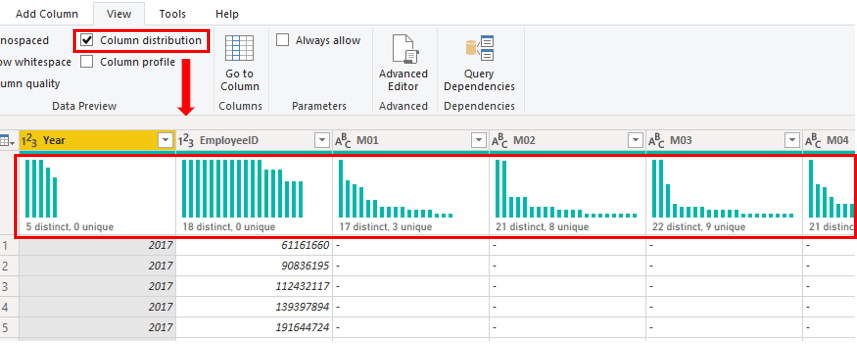

A column that has a lot of repeated values in its range will have a **low level of cardinality**. Conversely, a column that has a lot of unique values in its range will have a **high level of cardinality**.

Lower cardinality leads to more optimized performance, so we might need to reduce the number of high cardinally columns in our dataset.

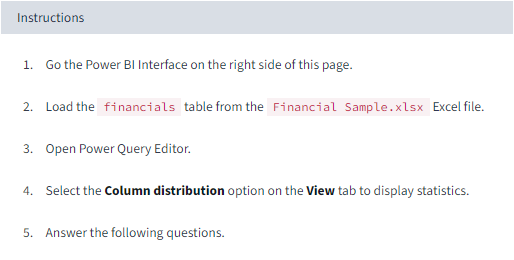

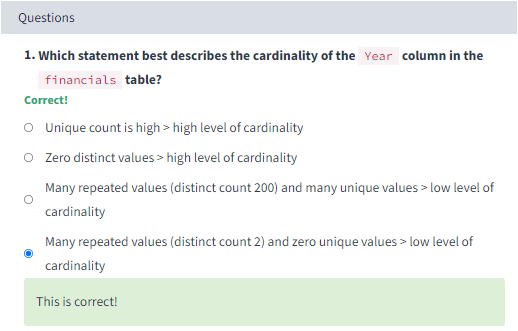

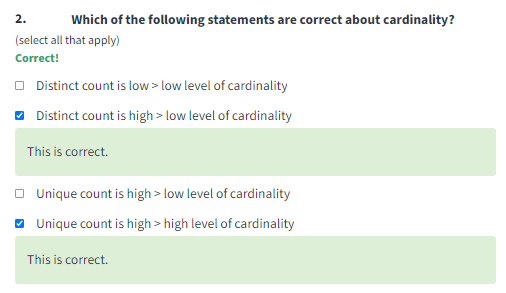

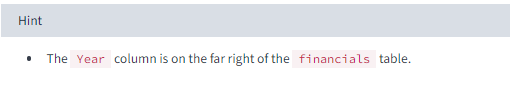

When we import multiple tables, it is possible that we'll do some analysis by using data from all those tables. **Relationships between those tables are necessary to accurately calculate results and display the correct information in our reports**. Power BI Desktop helps make creating those relationships easier. In fact, in most cases, we won't have to do anything, the **Autodetect** feature does it for us. However, we might occasionally have to create relationships or need to make changes to a relationship. Regardless, it's important to understand relationships in Power BI Desktop and how to create and edit them.

When we create or edit a relationship, we can configure additional options. By default, Power BI Desktop automatically configures additional options based on its best guess, which can be different for each relationship based on the data in the columns.

The relationships can have different cardinality. Cardinality is the direction of the relationship, and each model relationship must be defined with a cardinality type. The cardinality options in Power BI are:

* **Many-to-one (*:1)** - This relationship is the most common, default type. It means that the column in one table can have more than one instance of a value, and the other related table, often known as the lookup table, has only one instance of a value.
* **One-to-one (1:1)** - In this relationship type, the column in one table has only one instance of a particular value, and the other related table has only one instance of a particular value.
* **One-to-many (1:*)** - In this relationship type, the column in one table has only one instance of a particular value, and the other related table can have more than one instance of a value.
* **Many-to-many (:)** - With composite models, we can establish a many-to-many relationship between tables, which removes requirements for unique values in tables. It also removes previous workarounds, such as introducing new tables only to establish relationships.

During development, we will be creating and editing relationships in our model, so when we are building new relationships in our model, regardless of what cardinality we have chosen, always ensure that both of the columns that we are using to participate in a relationship are sharing the same data type. Our model will never work if we try to build a relationship between two columns, where one column has a text data type and another column has an integer data type.

In the following example, the `ProductID` field has the data type **Whole number** in the Product and Sales tables. The columns with data type **Integer** perform better than columns with data type Text.

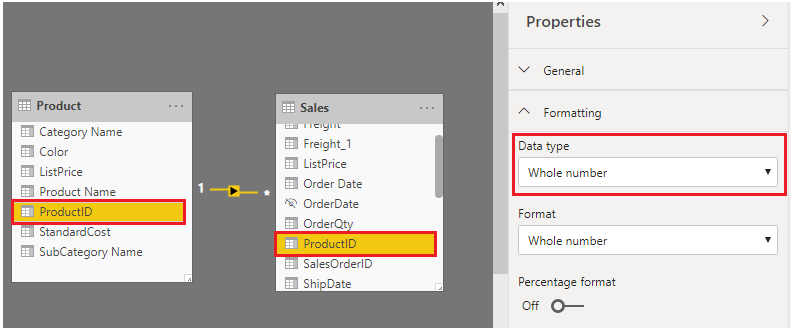

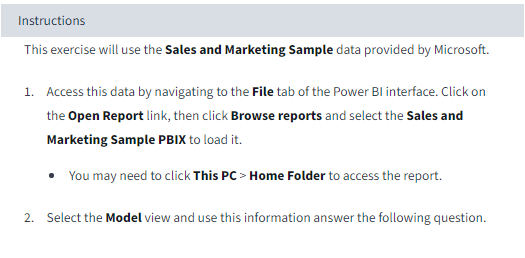

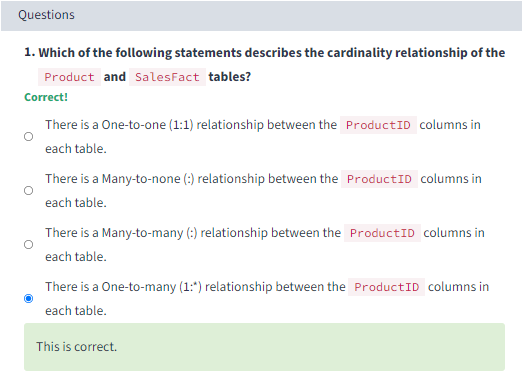

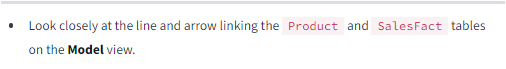

Power BI Desktop offers different techniques that we can use to help reduce the data that is loaded into data models, such as summarization. Reducing the data that is loaded into our model will improve the relationship cardinality of the report. For this reason, it is important that we strive to minimize the data that will be loaded into our models. This case is especially true for large models, or models that we anticipate will grow to become large over time.

Perhaps the most effective technique to reduce a model size is to use a summary table from the data source. Where a detail table might contain every transaction, a summary table would contain one record per day, per week, or per month. It might be an average of all of the transactions per day, for instance.

For example, a source sales fact table stores one row for each order line. Significant data reduction could be achieved by summarizing all sales metrics if we group by date, customer, and product, and individual transaction detail is not needed.

Consider, then, that an even more significant data reduction could be achieved by grouping by date at month level. It could achieve a possible 99 percent reduction in model size; but, reporting at day level or an individual order level is no longer possible. Deciding to summarize fact-type data will always involve a tradeoff with the detail of our data. A disadvantage is that we may lose the ability to drill into data because the detail no longer exists. This tradeoff could be mitigated by using a mixed model design.

In Power BI Desktop, a Mixed mode design produces a composite model. Essentially, it allows us to determine a storage mode for each table. Therefore, each table can have its Storage Mode property set as Import or DirectQuery.

An effective technique to reduce the model size is to set the **Storage Mode** property for larger fact-type tables to **DirectQuery**. This design approach can work well in conjunction with techniques that are used to summarize our data. For example, the summarized sales data could be used to achieve high performance **summary** reporting. A drill-through page could be created to display granular sales for specific (and narrow) filter context, displaying all in-context sales orders. The drill-through page would include visuals based on a **DirectQuery** table to retrieve the sales order data (sales order details).

For more information, see [Data reduction techniques for Import modeling](https://docs.microsoft.com/en-us/power-bi/guidance/import-modeling-data-reduction#group-by-and-summarize/?azure-portal=true).

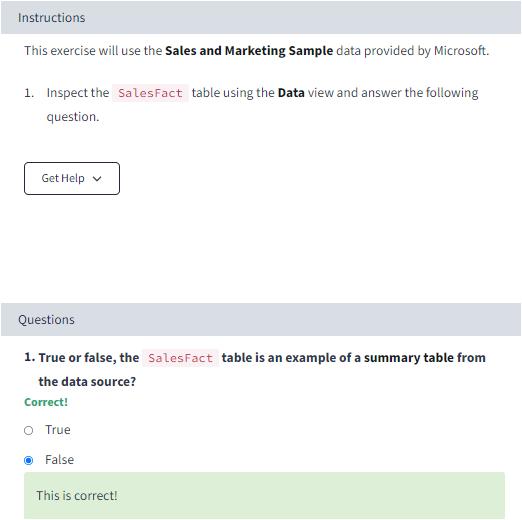

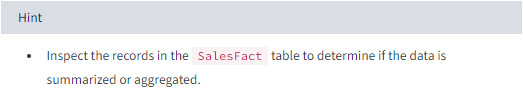

DirectQuery is one way to get data into Power BI Desktop. The DirectQuery method involves connecting directly to data in its source repository from within Power BI Desktop. It is an alternative to importing data into Power BI Desktop.

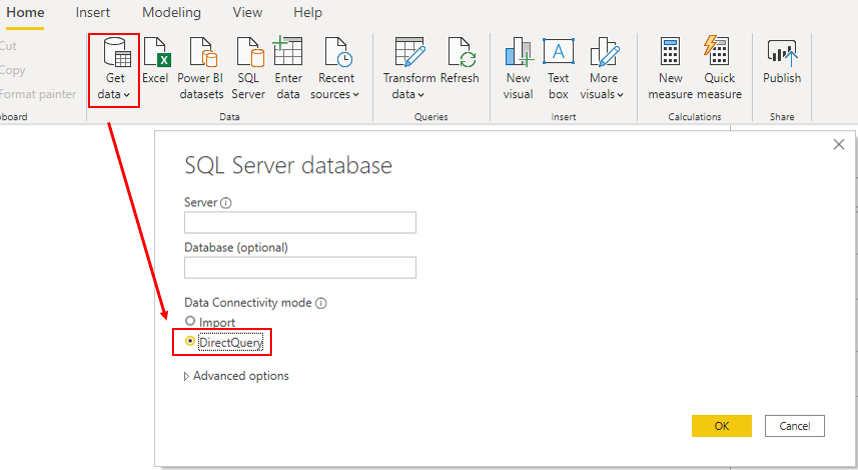

When we use the **DirectQuery** method, the overall user experience depends heavily on the performance of the underlying data source. Slow query response times will lead to a negative user experience and, in the worst-case scenarios, queries might time out. Also, the number of users who are opening the reports at any one time will impact the load that is placed on the data source. For example, if our report has 20 visuals in it and 10 people are using the report, 200 queries or more will exist on the data source because each visual will issue one or more queries. Unfortunately, the performance of our Power BI model will not only be impacted by the performance of the underlying data source, but also by other uncontrollable factors, such as:

* Network latency; faster networks return data quicker.
* The performance of the data source's server and how many other workloads are on that server. For example, consider the implications of a server refresh taking place while hundreds of people are using the same server for different reasons.

Therefore, using DirectQuery poses a risk to the quality of our model's performance. To optimize performance in this situation, we need to have control over, or access to, the source database. For more detailed information, see DirectQuery model guidance in Power BI Desktop.

**Implications of using DirectQuery:** It is best practice to import data into Power BI Desktop, but our organization might need to use the DirectQuery data connectivity mode because of one of the following reasons (benefits of DirectQuery):

* It is suitable in cases where data changes frequently and near real-time reporting is  necessary.
* It can handle large data without the need to pre-aggregate.
* It applies data sovereignty restrictions to comply with legal requirements.
* It can be used with a multidimensional data source that contains measures such as SAP Business Warehouse (BW).

If our organization needs to use DirectQuery, we should clearly understand its behavior within Power BI Desktop and be aware of its limitations. We will then be in a good position to take action to optimize the DirectQuery model as much as possible.

**Behavior of DirectQuery connections:** When we use DirectQuery to connect to data in Power BI Desktop, that connection behaves in the following ways:

* When we initially use the Get Data feature in Power BI Desktop, we will select the source. If we connect to a relational source, we can select a set of tables and each one will define a query that logically returns a set of data. If we select a multidimensional source, such as SAP BW, we can only select the source.
* When we load the data, no data is imported into the Power BI Desktop, only the schema is loaded. When we build a visual within Power BI Desktop, queries are sent to the underlying source to retrieve the necessary data. The time it takes to refresh the visual depends on the performance of the underlying data source.
* If changes are made to the underlying data, they won't be immediately reflected in the existing visuals in Power BI due to caching. We need to carry out a refresh to see those changes. The necessary queries are present for each visual, and the visuals are updated accordingly.
* When we publish the report to the Power BI service, it will result in a dataset in Power BI service, the same as for import. However, no data is included with that dataset.
* When we open an existing report in Power BI service, or build a new one, the underlying source is again queried to retrieve the necessary data. Depending on the location of the original source, we might have to configure an on-premises data gateway.
* We can pin visuals, or entire report pages, as dashboard tiles. The tiles are automatically refreshed on a schedule, for example, every hour. We can control the frequency of this refresh to meet our requirements. When we open a dashboard, the tiles reflect the data at the time of the last refresh and might not include the latest changes that are made to the underlying data source. We can always refresh an open dashboard to ensure that it's up-to-date.

Continuing with the Tailwind Traders scenario, during our review of the data model, we discover that the query used DirectQuery to connect Power BI Desktop to the source data. This use of DirectQuery is the reason why users are experiencing poor report performance. It's taking too long to load the pages in the report, and tables are not refreshing quickly enough when certain selections are made. We need to take action to optimize the performance of the DirectQuery model.

We can examine the queries that are being sent to the underlying source and try to identify the reason for the poor query performance. We can then make changes in Power BI Desktop and the underlying data source to optimize overall performance.

**Optimize data in Power BI Desktop**

When we have optimized the data source as much as possible, we can take further action within Power BI Desktop by using Performance analyzer, where we can isolate queries to validate query plans.

We can analyze the duration of the queries that are being sent to the underlying source to identify the queries that are taking a long time to load. In other words, we can identify where the bottlenecks exist.

We don't need to use a special approach when optimizing a DirectQuery model; we can apply the same optimization techniques that we used on the imported data to tune the data from the DirectQuery source. For example, we can reduce the number of visuals on the report page or reduce the number of fields that are used in a visual. We can also remove unnecessary columns and rows.

For more detailed guidance on how a optimize a DirectQuery query, see: [DirectQuery model guidance in Power BI Desktop and Guidance for using DirectQuery successfully](https://docs.microsoft.com/en-us/power-bi/guidance/directquery-model-guidance/).

**Optimize the underlying data source (connected database)**

Our first stop is the data source. We need to tune the source database as much as possible because anything we do to improve the performance of that source database will in turn improve Power BI DirectQuery. The actions that we take in the database will do the most good.

Consider the use of the following standard database practices that apply to most situations:

* Avoid the use of complex calculated columns because the calculation expression will be embedded into the source queries. It is more efficient to push the expression back to the source because it avoids the push down. We could also consider adding surrogate key columns to dimension-type tables.
* Review the indexes and verify that the current indexing is correct. If we need to create new indexes, ensure that they are appropriate.

Power BI Desktop gives us the option to send fewer queries and to disable certain interactions that will result in a poor experience if the resulting queries take a long time to run. Applying these options prevents queries from continuously hitting the data source, which should improve performance.

In this example, we edit the default settings to apply the available data reduction options to our model. We access the settings by selecting **File > Options and settings > Options**, scrolling down the page, and then selecting the **Query reduction** option. The following query reduction options are available:

* **Reduce number of queries sent by** - By default, every visual interacts with every other visual. Selecting this check box disables that default interaction. We can then optionally choose which visuals interact with each other by using the Edit interactions feature.
* **Slicers** - By default, the Instantly apply slicer changes option is selected. To force the report users to manually apply slicer changes, select the Add an apply button to each slicer to apply changes when we're ready option.
* **Filters** - By default, the Instantly apply basic filter changes option is selected. To force the report users to manually apply filter changes, select one of the alternative options:
    * Add an apply button to all basic filters to apply changes when we're ready
    * Add a single apply button to the filter pane to apply changes at once (preview)

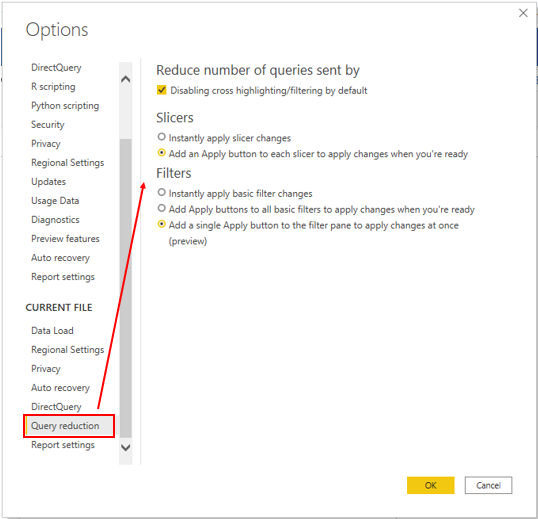

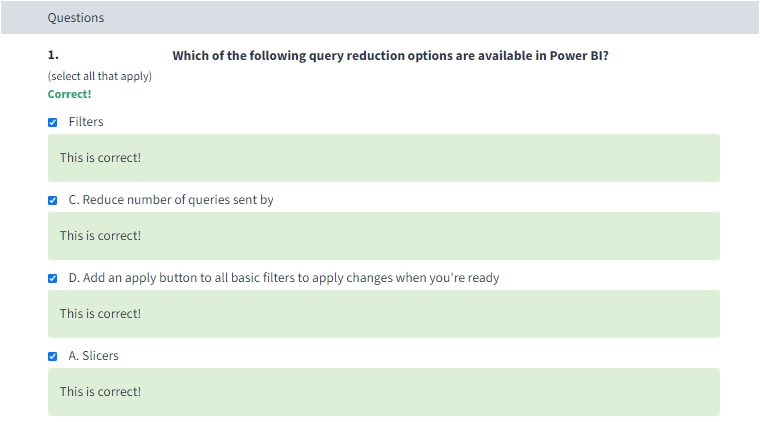

When aggregating data, we summarize that data and present it in at a higher grain (level). For example, we can summarize all sales data and group it by date, customer, product, and so on. The aggregation process reduces the table sizes in the data model, allowing us to focus on important data and helping to improve the query performance.

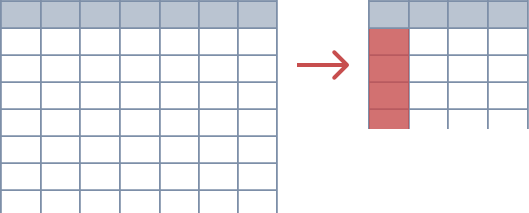

Our organization might decide to use aggregations in their data models for the following reasons:

* If we are dealing with a large amount of data (big data), aggregations will provide better query performance and help us analyze and reveal the insights of this large data. Aggregated data is cached and, therefore, uses a fraction of the resources that are required for detailed data.
* If we are experiencing a slow refresh, aggregations will help us speed up the refresh process. The smaller cache size reduces the refresh time, so data gets to users faster. Instead of refreshing what could be millions of rows, we would refresh a smaller amount of data instead.
* If we have a large data model, aggregations can help us reduce and maintain the size of our model.
* If we anticipate our data model growing in size in the future, we can use aggregations as a proactive step toward future proofing our data model by lessening the potential for performance and refresh issues and overall query problems.


Continuing with the Tailwind Traders scenario, we have taken several steps to optimize the performance of the data model, but the IT team has informed us that the file size is still too large. The file size is currently 1 gigabyte (GB), so we need to reduce it to around 50 megabytes (MB). During our performance review, we identified that the previous developer did not use aggregations in the data model, so we now want to create some aggregations for the sales data to reduce the file size and further optimize the performance.

Before we start creating aggregations, we should decide on the grain (level) on which we want to create them. In this example, we want to aggregate the sales data at the day level.

When we decide on the grain, the next step is to decide on how we want to create the aggregations. We can create aggregations in different ways and each method will yield the same results, for example:

* If we have access to the database, we could create a table with the aggregation and then import that table into Power BI Desktop.
* If we have access to the database, we could create a view for the aggregation and then import that view into Power BI Desktop.
* In Power BI Desktop, we can use Power Query Editor to create the aggregations step-by-step.

In this example, we open a query in Power Query Editor and notice that the data has not been aggregated; it has over 999 rows, as illustrated the following screenshot.

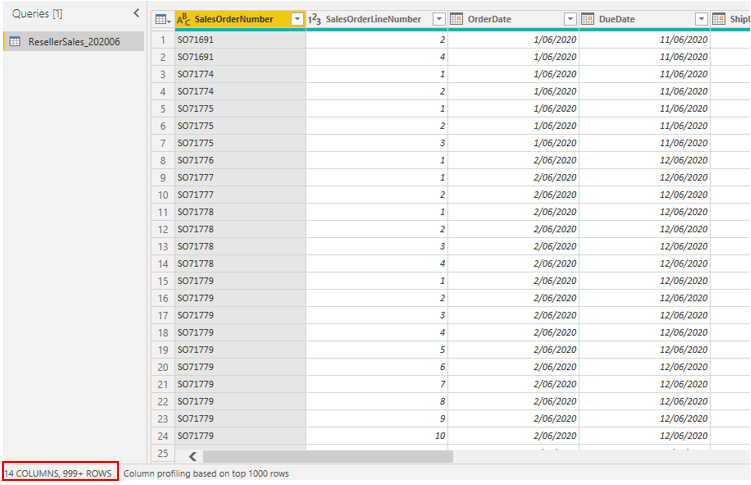

We want to aggregate the data by the `OrderDate` column and view the `OrderQuantity` and `SalesAmount` columns. We start by selecting **Choose Columns** on the **Home** tab. On the window that displays, we select the columns that we want in the aggregation and then select **OK**.

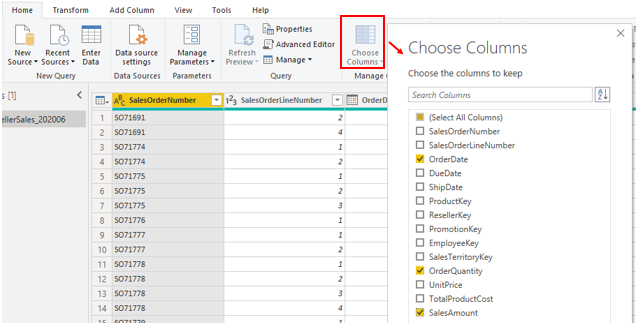

When the selected columns display on the page, we select the **Group By** option on the **Home** tab. On the window that displays, we select the column that we want to group by (`OrderDate`) and enter a name for the new column (`OnlineOrdersCount`).

We select the **Advanced** option and then select the **Add aggregation** button to display another column row. We enter a name for the aggregation column, select the operation of the column, and then select the column to which we want to link the aggregation.

We repeat these steps until we have added all the aggregations and then select **OK**.

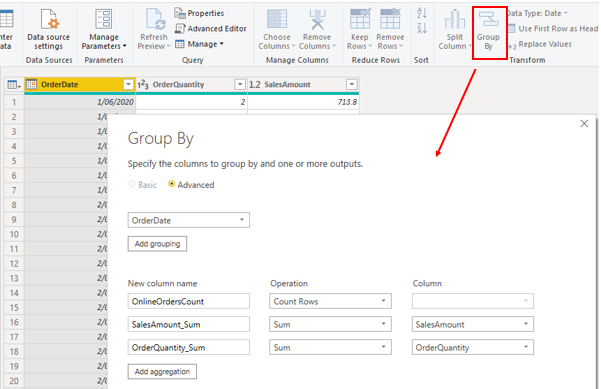

It might take a few minutes for aggregation to display, but when it does, we'll see how the data has been transformed. The data will be aggregated into each date, and we can see the values for the orders count and the respective sum of the sales amount and order quantity.

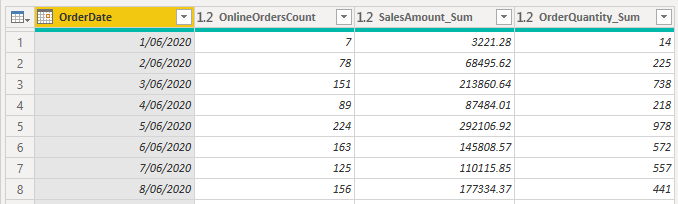

We select the **Close and Apply** button to close Power Query Editor and apply the changes to our data model. We return to the Power BI Desktop page and then select the **Refresh** button to see the results. If we observe the screen we'll see a brief message which displays the number of rows that our data model now has. This number of rows should be significantly less than the number that we started with. We can also see this number when we open Power Query Editor again, as illustrated in the following screenshot. In this example, the number of rows was reduced to 30.

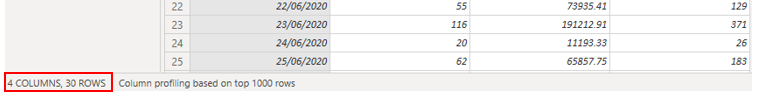

Remember, we started with over 999 rows. Using aggregation has significantly reduced the number of rows in our dataset, which means that Power BI has less data to refresh and our model should perform better.

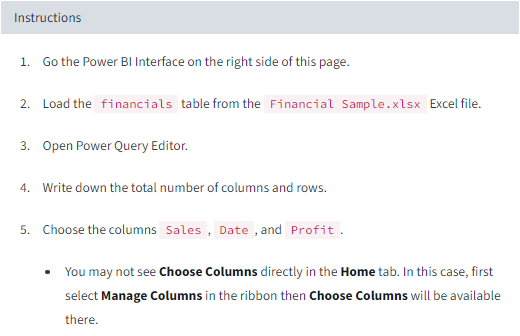

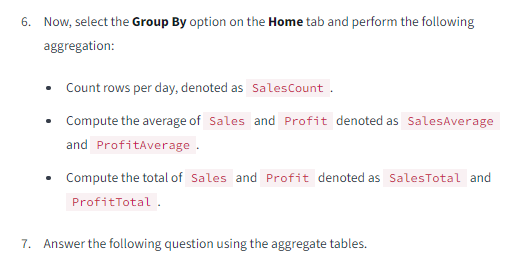

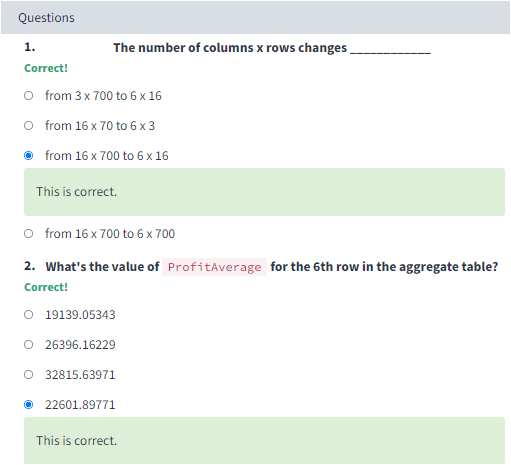

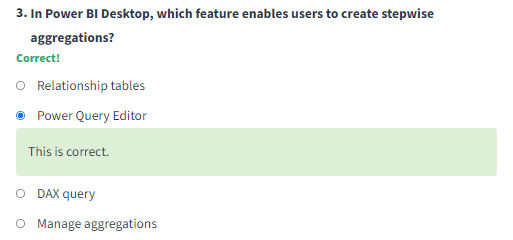

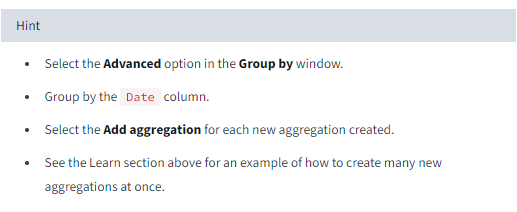

When we have created aggregations, we can manage those aggregations in Power BI Desktop and make changes to their behavior, if required.

We can open the **Manage Aggregations** window from any view in Power BI Desktop. In the **Fields** pane (the right side of the page), right-click the table and then select **Manage aggregations**

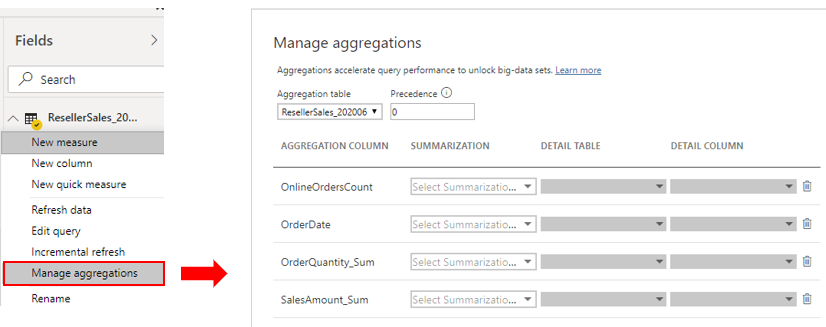.

For each aggregation column, we can select an option from the **Summarization** drop-down list and make changes to the selected detail table and column. When we're finished managing the aggregations, we select **Apply All**.

For more detailed information on how to create and manage aggregations, see Use [aggregations in Power BI Desktop](https://docs.microsoft.com/en-us/power-bi/transform-model/desktop-aggregations/).

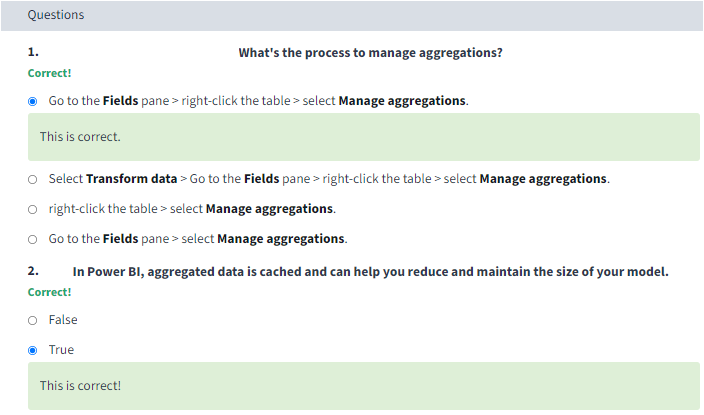

In this file, we learned how to improve performance by reducing cardinality levels, optimize DirectQuery models with table level storage, and create and manage aggregations.